In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

***After MNIST data set is load, lets divide it into training and test sets***

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 25s 2us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

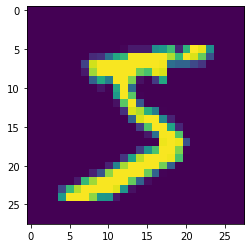

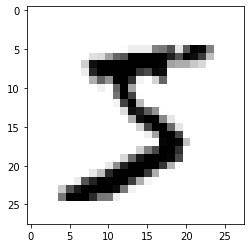

In [7]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0],cmap=plt
           .cm.binary)

**Checking each pixel value**

**Before Normalization**

In [10]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**Normalizing the data from 0-255 to 0-1**

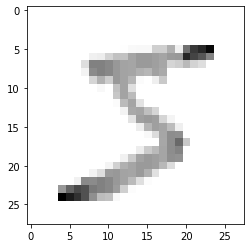

In [11]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0],cmap=plt.cm.binary)

**After Normalization**

In [12]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Resizing the image to make it suitable for the convolutional operation**

In [16]:
image_size = 28
X_trainr = np.array(X_train).reshape(-1,image_size,image_size,1)
X_testr = np.array(X_test).reshape(-1,image_size,image_size,1)
print(X_trainr.shape)
print(X_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D

In [19]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_2 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [22]:
print(X_trainr.shape)

(60000, 28, 28, 1)


In [24]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [26]:
model.fit(X_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.1144 - accuracy: 0.9658 - val_loss: 0.1111 - val_accuracy: 0.9661
Epoch 2/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.0811 - accuracy: 0.9748 - val_loss: 0.0687 - val_accuracy: 0.9787
Epoch 3/5
1313/1313 [==============================] - 79s 60ms/step - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.0803 - val_accuracy: 0.9759
Epoch 4/5
1313/1313 [==============================] - 87s 66ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0939 - val_accuracy: 0.9728
Epoch 5/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.0632 - val_accuracy: 0.9801


In [27]:
test_loss, test_acc = model.evaluate(X_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0578 - accuracy: 0.9831
0.05781341716647148
0.9830999970436096


In [28]:
predictions = model.predict([X_testr])

313/313 [==============================] - 4s 11ms/step


In [29]:
print(predictions)

[[1.2723351e-07 1.1373953e-05 3.5561694e-05 ... 9.9985337e-01
  8.3977875e-07 8.5188236e-05]
 [8.2116958e-06 9.0877467e-05 9.9961984e-01 ... 4.8950898e-07
  3.7624881e-07 9.2319709e-08]
 [4.1330377e-06 9.9991298e-01 1.0904245e-05 ... 9.2622677e-06
  9.4251809e-06 1.7829010e-06]
 ...
 [1.6143979e-08 4.0354556e-07 2.2862096e-07 ... 2.3479325e-07
  1.8948194e-05 1.0122492e-04]
 [1.0856677e-06 1.6322534e-06 3.5295763e-08 ... 1.2801089e-08
  9.5595809e-05 2.6451119e-06]
 [3.1463292e-06 4.8006914e-06 1.7137285e-06 ... 1.5078516e-09
  4.7769223e-05 5.7221932e-08]]


In [30]:
print(np.argmax(predictions[0]))

7


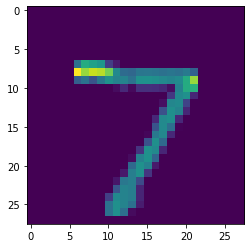

In [33]:
plt.imshow(X_test[0])

In [31]:
print(np.argmax(predictions[190]))

1


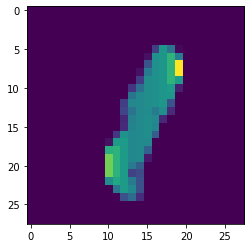

In [34]:
plt.imshow(X_test[190])